# Analysing decisions in data analysis

H. Sherry Zhang (University of Texas at Austin)  
Roger D. Peng (University of Texas at Austin)

this is the abstract

# Introduction

Something about “analysis review” - Roger thinks it’s a better to have a new word for this.

provide a baseline understand - place to start

demonstrate - analytically homogeneous - the table won’t look like that

In this work, we design a tabular format to record the choices made by analysts during data analysis. Using large language models, we automatically extract these choices from a set of research papers focused on specific topics, e.g. air pollution modelling. This allows us to analyze these choices as data – tracking how they’ve changed over time or query the possible methodologies used in similar studies. We also introduce a workflow to cluster paper based on decision similarity, using both the decisions themselves and the justifications authors provide for their choices.

# Background

Data analysis as an complicated, iterative process to make sense \[ref\] of the data collected. The iterative process of formulating hypothesis @jun2022.

Choices are made at nearly every stage of data analysis, ranging from variable pre-processing variables, variable and lag selection in model formulation, to the specification of smoothing parameter during model construction. These possible choices contribute to what @gelman2014 describe as the “garden of forking paths”. These choices can introduce substantial variability in results, which has been demonstrated in many-analyst experiments, where independent teams analyzing the same dataset to answer a pre-defined research question often arrive at markedly different conclusions. A prominent example is @silberzahn2018 where researchers reported a wide range of point estimates and 95% confidence intervals for the effect of soccer players’ skin tone on the number of red cards awarded by referees (odds ratio from 0.89 to 2.93). Similar findings have emerged in other domains, including structural equation modeling \[@sarstedt2024\], applied microeconomics \[@huntington-klein2021\], neuroimaging \[@botvinik-nezer2020\], and ecology and evolutionary biology \[@gould2025\].

Another line of work focuses on developing software tools to support analysts in making more informed decisions. For example, the `Tisane` package \[@jun2022\] integrates conceptual ideas, such as DAGs, and modelling structure (group/ cluster/ hierarchical structure), to assist junior researchers in specifying GLM and GLMM model. The `DeclareDesign` package \[@blair2019\] introduces the MIDA framework for researchers to declare, diagnose, and redesign their analyses to produce a distribution of the statistic of interest. This approach has been applied in randomized controlled trial \[@bishop2024\] .

The `multiverse` package

-   facilitates the specification and execution of multiple parallel choices for sensitivity analysis, allowing researchers to systematically explore how different choices affect results and to report the range of plausible outcomes that arise from alternative analytic paths.

Study decisions in data analysis:

-   interview analysts and researchers to provide recommendation for data analysis practices \[@kale2019; @alspaugh2019; @liu2020\].
-   @liu2020 provides visualization to communicate the decision processes through the Analytic Decision Graphs (ADG)
-   @simson2025 conducts a participatory AI study to demonstrate the “garden of forking paths” of decisions in data analysis and how it affects ML fairness

# Extracting decisions from data analysis

## decisions in data analysis

-   give example from extracting decision from sentences of a paper
-   adapt from the tidy data principle - each row is a decision @wickham2014  
-   some decisions are related to how the variable is estimated spatially and temporally
-   model level decisions on how the model is estimated spatially (for multi-site analyses) and/or temporally (different treatments for years or seasons)
-   sometimes the decisions are not explicitly stated in the paper (use AIC to choose the degree of freedom in a smoothing spline)
-   sometimes the reason is not explicitly stated (e.g., why 3 degree of freedom)

A hypothetical database of decisions may look as follows:

| Paper | ID | Model | variable | method | parameter | type | reason | decision |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| ostro | 1 | Poisson regression | temperature | smoothing spline | degree of freedom | parameter | NA | 3 degree of freedom |
| ostro | 2 | Poisson regression | temperature | smoothing spline | degree of freedom | temporal | NA | 1-day lag |
| ostro | 3 | Poisson regression | relative humidity | LOESS | smoothing parameter | parameter | to minimize Akaike’s Information Criterion | NA |
| ostro | 4 | Poisson regression | model | NA | NA | spatial | to account for variation among cities | separate regression models fit in each city |

## Automatic reading of literature with LLM

-   We use LLM to automatic process the literature to output analysis decisions. Currently, two LLMs, Antropic Claude and Google Gemini, are able to take input of pdf documents and the results reported in this paper is based on Gemini’s output. See the section sensitivity analysis for the comparison of the two models.
-   Claude is decoder only, Gemini is an encoder–decoder model
    -   these models may paraphrase or hallucinate unless explicitly told not to since it is generative in nature based on the predicted probability of the next word from the text and the instruction
-   prompt: instruct the LLM to produce a markdown file with decisions included in a JSON block with the fields described in Section xxx
-   use the `ellmer` package \[@ellmer\] to connect to Gemini API to process the pdf documents in R.
-   experiment with seed and temperature
-   Our task involve a reasoning component in that it requires casual reasoning to identify the decisions made by the authors, and its justification/ rationale, rather than purely summarizing the text through pattern-matching.

## Review the LLM output

-   something about result validation of LLM output

The shiny app is designed to provide users a visual interface to review and edit the decisions extracted by the LLM from the literature. The app allows three actions from the users: 1) *overwrite* – modify the content of a particular cell, equivalently `dplyr::mutate(xxx = ifelse(CONDITION, "yyy" , xxx))`, 2) *delete* – remove a particular cell, `dplyr::filter(!(CONDITION))`, and 3) *add* – manually enter a decision, `dplyr::bind_rows()`. @fig-shiny illustrates the *overwrite* action in the Shiny application, where users interactively filter the data and preview the rows affected by their edits—in this case, changing the model entry from “generalized additive Poisson time series regression” to the less verbose “Poisson regression”. Upon confirmation, the corresponding `tidyverse` code is generated, and users can download the edited table and incorporate the code into their R script.

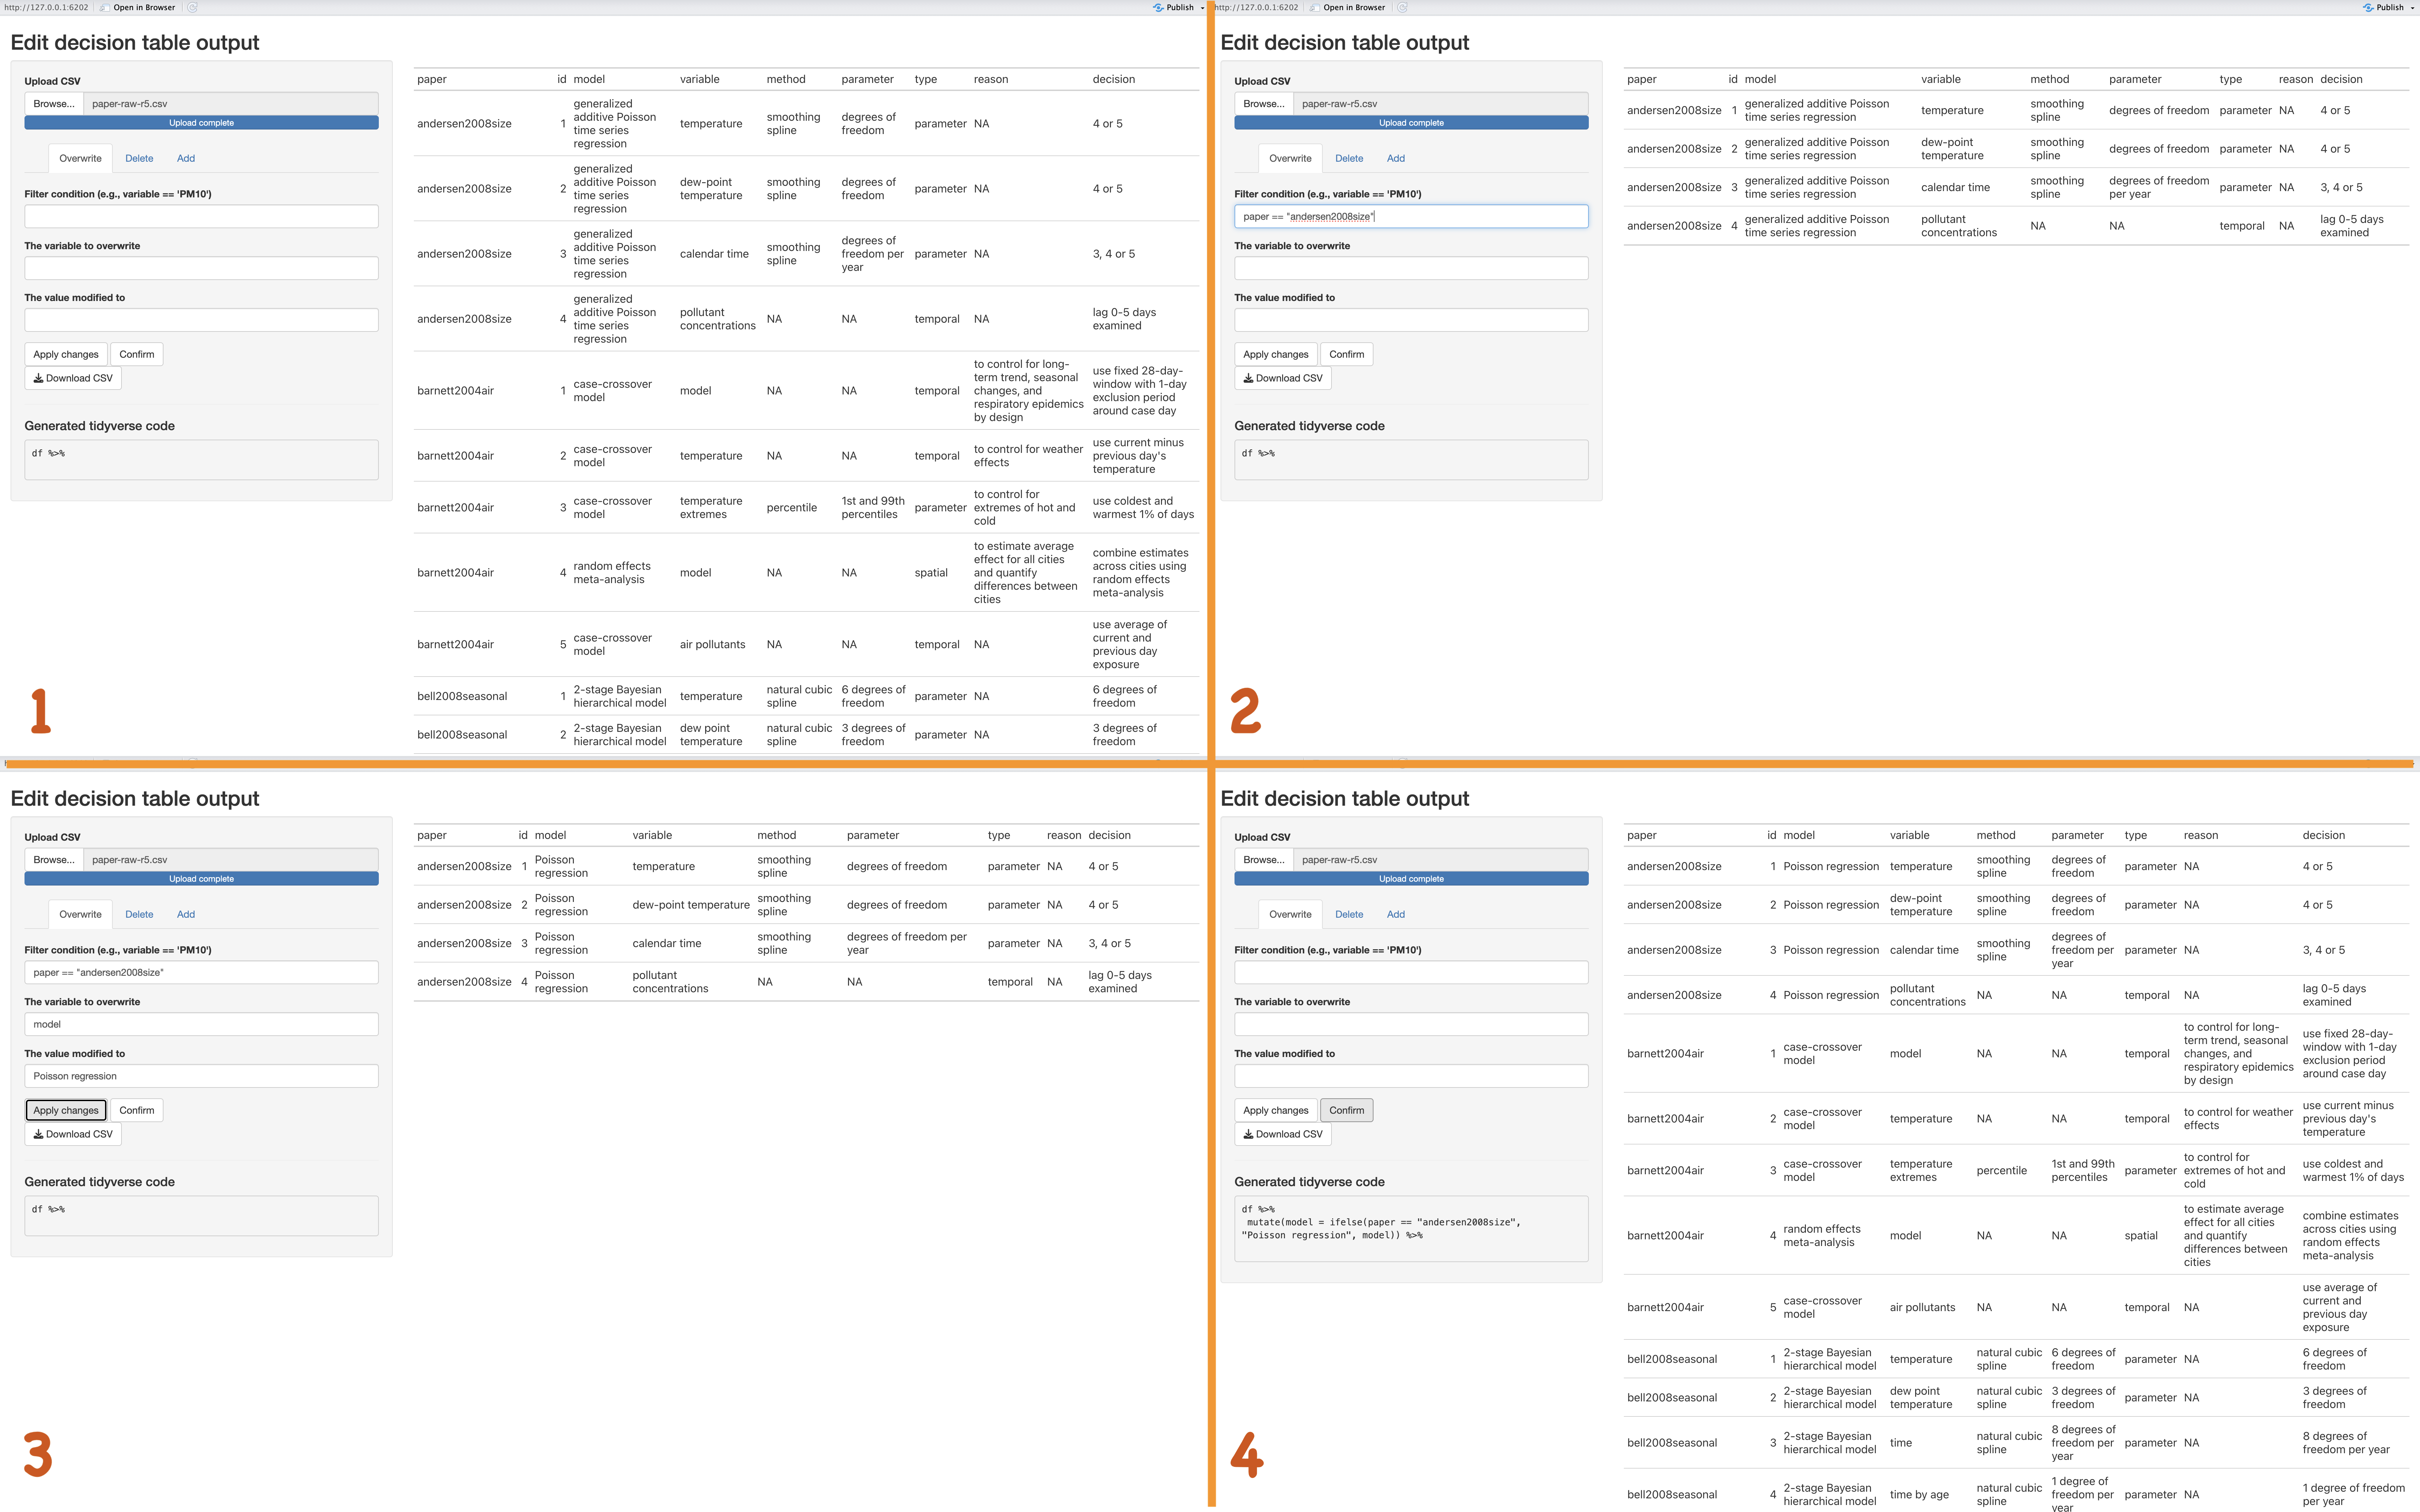

In [ ]:
knitr::include_graphics("figures/shiny.png")

## Decision quality summary

# Paper similarity calculation

-   pre-processing
    -   standardize statistical methods its corresponding parameters (LOESS, smoothing spline, etc)
    -   group variables into broader categories: time, temperature, humidity, PM
-   identify the most frequent analysis decisions across papers
-   retain only papers that report more than x such decisions
-   measure similarity between decisions and their justificaiton using NLP
    -   word embedding with attention mechanism, instead of bag of word,
    -   specific NLP models (default to `bert-base-uncased`), aggregation methods from word to text
-   compute paper similarity score for each paper pair by aggregating decision-level compoarisons
    -   check/ report on the number of decisions compared in each paper pair
-   similarity score can serve as the distance matrix to cluster papers by their similarity on decision choices

# Sensitivity analysis

sensitivity of the pipeline: 1) LLM, 2) text model, 3) prompt, 4) LLM parameters

-   standard `BERT` \[@devlin2019\], `Roberta` \[@liu\]: trained on a much larger dataset (160GB v.s. BERT’s 15GB), `transformer-xl` \[@dai\], `xlnet` by Google Brain \[@yang\], and two domain-trained BERT models: `sciBert` \[@beltagy2019\] and `bioBert`\[@lee2020\], trained on PubMed and PMC data.

-   A section on reproducibility of LLM outputs: prompt experiment (see if there are papers discussing this: https://arxiv.org/pdf/2406.06608)

# Applications: Air pollution mortality modelling

-   look at for one type of decision (time) - what are the choices made by different papers
-   look at whether decisions changes across time
-   Visualize the decision database: apply clustering algorithm and visualize the database through `sigma.js`

# Discussion

-   Only prompting engineering is used to extract decisions from the literature. We expect that fine-tuning the model on statistical or domain-specific literature to yield more robust performance on the same document, though it would require substantially more training effort.
-   people from the NYU-LMU workshop are interested to have code script attached as well because people can do one thing in the script but report another in the paper - it would be interesting to compare the paper and the script with some syntax extraction.
-   Validation of the output:

# Reference